In [2]:
#1. Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load dataset
df=pd.read_csv('/content/Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
#2. Data Preprocessing
# Convert categorical to numeric using one-hot encoding
df=pd.get_dummies(df,drop_first=True)
# Check nulls and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [4]:
#3. Train-Test Split
X=df.drop('price',axis=1)
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [5]:
#4. Fit Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [6]:
#5. Evaluate the Model
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.65


In [8]:
#6. Coefficients Interpretation(interpret coefficients)
coefficients=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
# Suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
print(coefficients)


                                 Coefficient
area                                  235.97
bedrooms                            76778.70
bathrooms                         1094444.79
stories                            407476.59
parking                            224841.91
mainroad_yes                       367919.95
guestroom_yes                      231610.04
basement_yes                       390251.18
hotwaterheating_yes                684649.89
airconditioning_yes                791426.74
prefarea_yes                       629890.57
furnishingstatus_semi-furnished   -126881.82
furnishingstatus_unfurnished      -413645.06


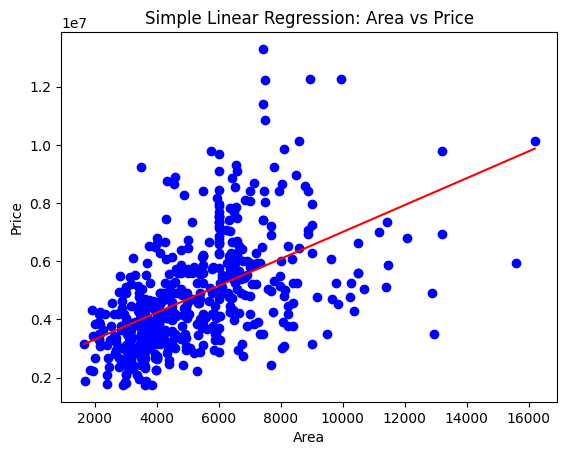

In [11]:
#Plot Regression
X_area=df[['area']]
y=df['price']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_area,y)
y_pred=model.predict(X_area)

# Sort for smooth line
sorted_idx=X_area['area'].argsort()
X_sorted=X_area['area'].values[sorted_idx]
y_sorted=y_pred[sorted_idx]

# Plot Regression
plt.scatter(X_area,y,color='blue')
plt.plot(X_sorted, y_sorted,color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.show()
# Blue dots show the actual data points (area vs. price).
# Red line is the fitted regression line — a smooth, increasing line representing predicted prices based on area.